In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import optimizers

from keras.datasets import mnist
from keras.utils import to_categorical
import keras

from keras.models import load_model

Using TensorFlow backend.


In [0]:
# ### loading mist hand written dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:


## Applying threshold for removing noise 

_,X_train_th = cv2.threshold(X_train,127,255,cv2.THRESH_BINARY)
_,X_test_th = cv2.threshold(X_test,127,255,cv2.THRESH_BINARY)



In [0]:
### Reshaping 

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


# ### Creating categorical output from 0 to 9

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)


# ## cross checking shape of input and output

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [0]:
# # Creating CNN model

input_shape = (28,28,1)
number_of_classes = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train,epochs=8, shuffle=True,
                    batch_size = 200,validation_data= (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0503 - accuracy: 0.9853 - val_loss: 0.0411 - val_accuracy: 0.9878
Epoch 2/8
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0434 - accuracy: 0.9872 - val_loss: 0.0322 - val_accuracy: 0.9899
Epoch 3/8
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0370 - val_accuracy: 0.9895
Epoch 4/8
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0356 - accuracy: 0.9893 - val_loss: 0.0373 - val_accuracy: 0.9900
Epoch 5/8
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0335 - val_accuracy: 0.9910
Epoch 6/8
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0275 - accuracy: 0.9920 - val_loss: 0.0368 - val_accuracy: 0.9901
Epoch 7/8
60000/60000 [==============================] - 138s 2ms/st

In [0]:
## Saving weights of model
model.save('digit_classifier.h5')




----------------Original Image--------------------


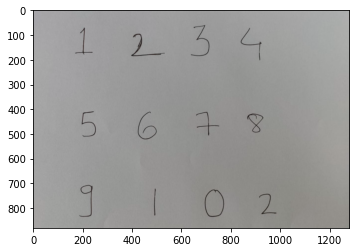




----------------Greyscaled Image--------------------


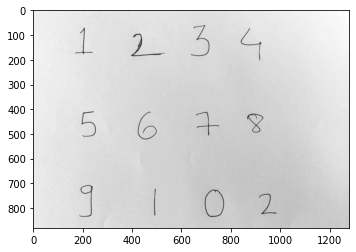




----------------Thresh Image--------------------


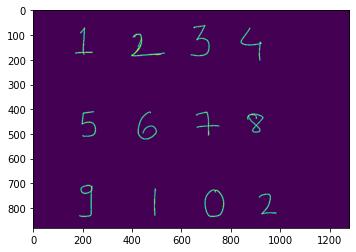




----------------Dilated Image 1--------------------


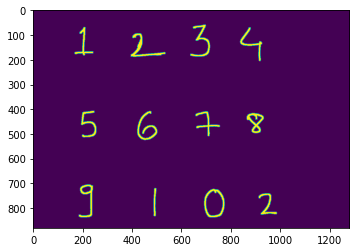




----------------Eroded Image--------------------


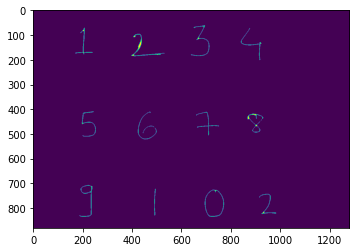




----------------Dilated Image 2--------------------


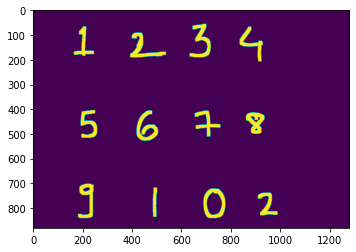




----------------Contoured Image--------------------


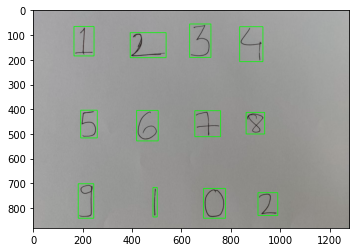

In [28]:
###### input_img.jpeg
image = cv2.imread('input_img.jpeg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grey, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,17,7)
cont = image.copy()

kerneld = np.ones((5,5),np.uint8)
kerneler = np.ones((3,3),np.uint8)
dilation1 = cv2.dilate(thresh.copy(),kerneld,iterations = 1)
erosion = cv2.erode(dilation1.copy(),kerneler,iterations = 3)
dilation2 = cv2.dilate(erosion.copy(),kerneld,iterations = 3)



contours, _ = cv2.findContours(dilation2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(cont, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (22, 22)
    resized_digit = cv2.resize(digit, (22,22))
    
    # Padding the digit with 3 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((3,3),(3,3)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Original Image--------------------")
plt.imshow(image)
plt.show()
print("\n\n\n----------------Greyscaled Image--------------------")
plt.imshow(grey, cmap="gray")
plt.show()
print("\n\n\n----------------Thresh Image--------------------")
plt.imshow(thresh)
plt.show()
print("\n\n\n----------------Dilated Image 1--------------------")
plt.imshow(dilation1)
plt.show()
print("\n\n\n----------------Eroded Image--------------------")
plt.imshow(erosion)
plt.show()
print("\n\n\n----------------Dilated Image 2--------------------")
plt.imshow(dilation2)
plt.show()
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(cont, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

In [0]:
## Loading the trained model
model = load_model('digit_classifier.h5')



---------------------------------------


=========PREDICTION============ 




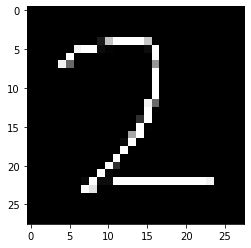



Final Output: 2


---------------------------------------


=========PREDICTION============ 




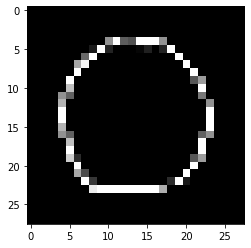



Final Output: 0


---------------------------------------


=========PREDICTION============ 




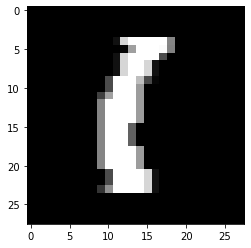



Final Output: 1


---------------------------------------


=========PREDICTION============ 




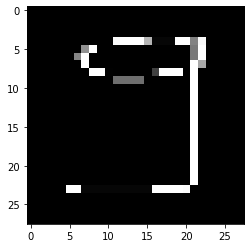



Final Output: 2


---------------------------------------


=========PREDICTION============ 




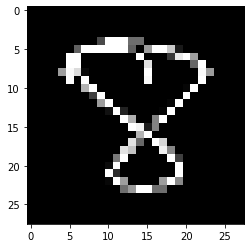



Final Output: 2


---------------------------------------


=========PREDICTION============ 




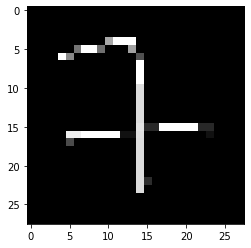



Final Output: 7


---------------------------------------


=========PREDICTION============ 




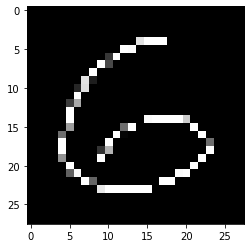



Final Output: 5


---------------------------------------


=========PREDICTION============ 




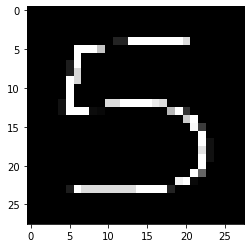



Final Output: 3


---------------------------------------


=========PREDICTION============ 




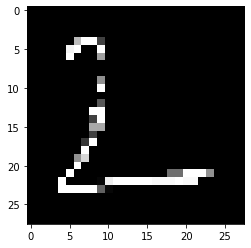



Final Output: 2


---------------------------------------


=========PREDICTION============ 




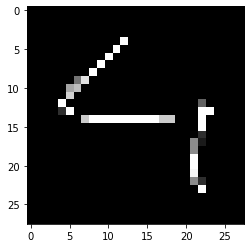



Final Output: 4


---------------------------------------


=========PREDICTION============ 




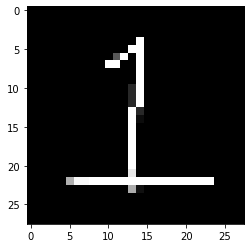



Final Output: 1


---------------------------------------


=========PREDICTION============ 




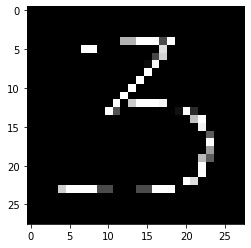



Final Output: 3


In [30]:
## Predicting the digits detected
predictions = []

for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1)) 
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    
    Number = np.argmax(prediction)
    predictions.append(str(Number))
    
#     print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
#     hard_maxed_prediction = np.zeros(prediction.shape)
#     hard_maxed_prediction[0][np.argmax(prediction)] = 1
#     print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
#     print ("\n\n---------------------------------------\n\n")

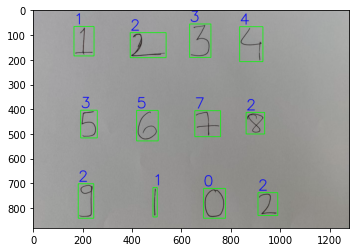

In [31]:
## Showing the final result
i=0
result = image.copy()
for c in contours:
  
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(result, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    cv2.putText(result, str(predictions[i]), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv2.LINE_AA)
    i+=1
plt.imshow(result)
plt.show()